In [35]:
import pandas as pd
import numpy as np

In [36]:
data = pd.read_csv("../rtgender/annotations.csv")

In [37]:
data.head()

,source,op_gender,post_text,response_text,sentiment,relevance
0,facebook_wiki,W,Stopped by Fashion Week and got to hang with A...,You are Both Sweet Ashley Tisdale and Lauren C...,Positive,Poster
1,facebook_wiki,M,"Well guys, real progress is happening. I'm 50 ...",Give us the first page to read. ONE PAGE.,Mixed,Content
2,facebook_wiki,W,Tonight is going to be a good night #PerfectMo...,this is my city was there 2 weeks a go,Neutral,Content
3,facebook_wiki,M,I know grandma Gilmore is real proud of you ht...,if grizzly Adams had a beard.,Neutral,Content
4,facebook_wiki,W,#NEWS to KNOW this AM - Mayor Emanuel will mak...,"Good morning Lourdes, have a great day! Great ...",Positive,Irrelevant


In [38]:
data['op_gender_num'] = np.where(data['op_gender']=='W', 1, 0)

In [39]:
data.head()

,source,op_gender,post_text,response_text,sentiment,relevance,op_gender_num
0,facebook_wiki,W,Stopped by Fashion Week and got to hang with A...,You are Both Sweet Ashley Tisdale and Lauren C...,Positive,Poster,1
1,facebook_wiki,M,"Well guys, real progress is happening. I'm 50 ...",Give us the first page to read. ONE PAGE.,Mixed,Content,0
2,facebook_wiki,W,Tonight is going to be a good night #PerfectMo...,this is my city was there 2 weeks a go,Neutral,Content,1
3,facebook_wiki,M,I know grandma Gilmore is real proud of you ht...,if grizzly Adams had a beard.,Neutral,Content,0
4,facebook_wiki,W,#NEWS to KNOW this AM - Mayor Emanuel will mak...,"Good morning Lourdes, have a great day! Great ...",Positive,Irrelevant,1


In [40]:
data.sentiment.unique()

array(['Positive', 'Mixed', 'Neutral', 'Negative'], dtype=object)

In [41]:
data['sentiment_num'] = data['sentiment'].replace(['Positive', 'Mixed', 'Neutral', 'Negative'], [ 2,1,0,-1])

In [42]:
data.head()

,source,op_gender,post_text,response_text,sentiment,relevance,op_gender_num,sentiment_num
0,facebook_wiki,W,Stopped by Fashion Week and got to hang with A...,You are Both Sweet Ashley Tisdale and Lauren C...,Positive,Poster,1,2
1,facebook_wiki,M,"Well guys, real progress is happening. I'm 50 ...",Give us the first page to read. ONE PAGE.,Mixed,Content,0,1
2,facebook_wiki,W,Tonight is going to be a good night #PerfectMo...,this is my city was there 2 weeks a go,Neutral,Content,1,0
3,facebook_wiki,M,I know grandma Gilmore is real proud of you ht...,if grizzly Adams had a beard.,Neutral,Content,0,0
4,facebook_wiki,W,#NEWS to KNOW this AM - Mayor Emanuel will mak...,"Good morning Lourdes, have a great day! Great ...",Positive,Irrelevant,1,2


In [43]:
data.relevance.unique()

array(['Poster', 'Content', 'Irrelevant', 'ContentPoster'], dtype=object)

In [44]:
data['relevance_num'] = data['relevance'].replace(['Poster', 'Content', 'Irrelevant', 'ContentPoster'], [ 3,2,0,1])

In [45]:
data.head()

,source,op_gender,post_text,response_text,sentiment,relevance,op_gender_num,sentiment_num,relevance_num
0,facebook_wiki,W,Stopped by Fashion Week and got to hang with A...,You are Both Sweet Ashley Tisdale and Lauren C...,Positive,Poster,1,2,3
1,facebook_wiki,M,"Well guys, real progress is happening. I'm 50 ...",Give us the first page to read. ONE PAGE.,Mixed,Content,0,1,2
2,facebook_wiki,W,Tonight is going to be a good night #PerfectMo...,this is my city was there 2 weeks a go,Neutral,Content,1,0,2
3,facebook_wiki,M,I know grandma Gilmore is real proud of you ht...,if grizzly Adams had a beard.,Neutral,Content,0,0,2
4,facebook_wiki,W,#NEWS to KNOW this AM - Mayor Emanuel will mak...,"Good morning Lourdes, have a great day! Great ...",Positive,Irrelevant,1,2,0


In [46]:
data.to_csv("./preprocessed_data/annotations_for_R.csv")

In [47]:
data1 = data.groupby(['source','op_gender', 'relevance']
                ).size().unstack(fill_value=0)

# 

In [48]:
data1 = data1.reset_index()
data1

relevance,source,op_gender,Content,ContentPoster,Irrelevant,Poster
0,facebook_congress,M,867,537,402,403
1,facebook_congress,W,732,474,348,417
2,facebook_wiki,M,744,214,272,200
3,facebook_wiki,W,596,294,236,328
4,fitocracy,M,732,418,90,221
5,fitocracy,W,758,405,54,226
6,reddit,M,1030,154,87,91
7,reddit,W,1041,167,75,87
8,ted,M,804,216,149,162
9,ted,W,802,248,90,181


In [49]:
data1['sum1'] = data1['Content'] + data1['ContentPoster'] +  data1['Poster'] +  data1['Irrelevant']
data1

relevance,source,op_gender,Content,ContentPoster,Irrelevant,Poster,sum1
0,facebook_congress,M,867,537,402,403,2209
1,facebook_congress,W,732,474,348,417,1971
2,facebook_wiki,M,744,214,272,200,1430
3,facebook_wiki,W,596,294,236,328,1454
4,fitocracy,M,732,418,90,221,1461
5,fitocracy,W,758,405,54,226,1443
6,reddit,M,1030,154,87,91,1362
7,reddit,W,1041,167,75,87,1370
8,ted,M,804,216,149,162,1331
9,ted,W,802,248,90,181,1321


In [50]:
data1['Content'] = data1['Content']/data1['sum1']
data1

relevance,source,op_gender,Content,ContentPoster,Irrelevant,Poster,sum1
0,facebook_congress,M,0.392485,537,402,403,2209
1,facebook_congress,W,0.371385,474,348,417,1971
2,facebook_wiki,M,0.520280,214,272,200,1430
3,facebook_wiki,W,0.409904,294,236,328,1454
4,fitocracy,M,0.501027,418,90,221,1461
5,fitocracy,W,0.525295,405,54,226,1443
6,reddit,M,0.756241,154,87,91,1362
7,reddit,W,0.759854,167,75,87,1370
8,ted,M,0.604057,216,149,162,1331
9,ted,W,0.607116,248,90,181,1321


In [51]:
data1['ContentPoster'] = data1['ContentPoster']/data1['sum1']
data1

relevance,source,op_gender,Content,ContentPoster,Irrelevant,Poster,sum1
0,facebook_congress,M,0.392485,0.243096,402,403,2209
1,facebook_congress,W,0.371385,0.240487,348,417,1971
2,facebook_wiki,M,0.520280,0.149650,272,200,1430
3,facebook_wiki,W,0.409904,0.202201,236,328,1454
4,fitocracy,M,0.501027,0.286105,90,221,1461
5,fitocracy,W,0.525295,0.280665,54,226,1443
6,reddit,M,0.756241,0.113069,87,91,1362
7,reddit,W,0.759854,0.121898,75,87,1370
8,ted,M,0.604057,0.162284,149,162,1331
9,ted,W,0.607116,0.187737,90,181,1321


In [52]:
data1['Irrelevant'] = data1['Irrelevant']/data1['sum1']
data1

relevance,source,op_gender,Content,ContentPoster,Irrelevant,Poster,sum1
0,facebook_congress,M,0.392485,0.243096,0.181983,403,2209
1,facebook_congress,W,0.371385,0.240487,0.176560,417,1971
2,facebook_wiki,M,0.520280,0.149650,0.190210,200,1430
3,facebook_wiki,W,0.409904,0.202201,0.162311,328,1454
4,fitocracy,M,0.501027,0.286105,0.061602,221,1461
5,fitocracy,W,0.525295,0.280665,0.037422,226,1443
6,reddit,M,0.756241,0.113069,0.063877,91,1362
7,reddit,W,0.759854,0.121898,0.054745,87,1370
8,ted,M,0.604057,0.162284,0.111946,162,1331
9,ted,W,0.607116,0.187737,0.068130,181,1321


In [53]:
data1['Poster'] = data1['Poster']/data1['sum1']
data1

relevance,source,op_gender,Content,ContentPoster,Irrelevant,Poster,sum1
0,facebook_congress,M,0.392485,0.243096,0.181983,0.182435,2209
1,facebook_congress,W,0.371385,0.240487,0.176560,0.211568,1971
2,facebook_wiki,M,0.520280,0.149650,0.190210,0.139860,1430
3,facebook_wiki,W,0.409904,0.202201,0.162311,0.225585,1454
4,fitocracy,M,0.501027,0.286105,0.061602,0.151266,1461
5,fitocracy,W,0.525295,0.280665,0.037422,0.156618,1443
6,reddit,M,0.756241,0.113069,0.063877,0.066814,1362
7,reddit,W,0.759854,0.121898,0.054745,0.063504,1370
8,ted,M,0.604057,0.162284,0.111946,0.121713,1331
9,ted,W,0.607116,0.187737,0.068130,0.137017,1321


In [54]:
data1

relevance,source,op_gender,Content,ContentPoster,Irrelevant,Poster,sum1
0,facebook_congress,M,0.392485,0.243096,0.181983,0.182435,2209
1,facebook_congress,W,0.371385,0.240487,0.176560,0.211568,1971
2,facebook_wiki,M,0.520280,0.149650,0.190210,0.139860,1430
3,facebook_wiki,W,0.409904,0.202201,0.162311,0.225585,1454
4,fitocracy,M,0.501027,0.286105,0.061602,0.151266,1461
5,fitocracy,W,0.525295,0.280665,0.037422,0.156618,1443
6,reddit,M,0.756241,0.113069,0.063877,0.066814,1362
7,reddit,W,0.759854,0.121898,0.054745,0.063504,1370
8,ted,M,0.604057,0.162284,0.111946,0.121713,1331
9,ted,W,0.607116,0.187737,0.068130,0.137017,1321


In [55]:
X = ['facebook_congress', 'facebook_wiki', 'ted', 'fitocracy', 'reddit']


y = []
y1 = []
for i in X:
    y.append(data1[((data1['op_gender']=='W') & (data1['source']==i))]['Poster'])
    y1.append(data1[((data1['op_gender']=='M') & (data1['source']==i))]['Poster'])



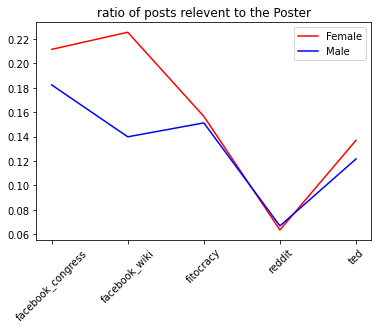

In [56]:
import matplotlib.pyplot as plt
plt.plot(data1[data1['op_gender']=='W']['source'],data1[data1['op_gender']=='W']['Poster'], color='red' )
plt.plot(data1[data1['op_gender']=='M']['source'],data1[data1['op_gender']=='M']['Poster'], color='blue' )
plt.title("ratio of posts relevent to the Poster")
plt.xticks(rotation=45)
plt.legend(['Female', 'Male'])
plt.show()

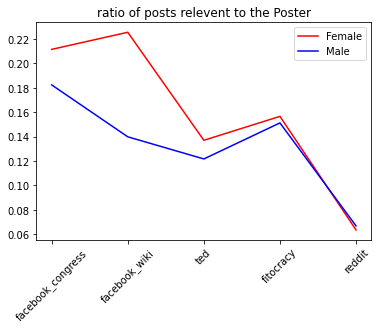

In [57]:
plt.plot(X,y, color='red' )
plt.plot(X, y1, color='blue' )
plt.title("ratio of posts relevent to the Poster")
plt.xticks(rotation=45)
plt.legend(['Female', 'Male'])
plt.show()

In [58]:
data1 = data.groupby(['source','op_gender', 'sentiment']
                ).size().unstack(fill_value=0)

# 

In [59]:
data1 = data1.reset_index()
data1

sentiment,source,op_gender,Mixed,Negative,Neutral,Positive
0,facebook_congress,M,233,662,381,933
1,facebook_congress,W,223,560,329,859
2,facebook_wiki,M,105,220,388,717
3,facebook_wiki,W,79,105,317,953
4,fitocracy,M,104,48,344,965
5,fitocracy,W,83,32,306,1022
6,reddit,M,211,295,607,249
7,reddit,W,183,299,577,311
8,ted,M,171,166,289,705
9,ted,W,164,152,212,793


In [60]:
data1['sum1'] = data1['Mixed'] + data1['Negative'] +  data1['Neutral'] +  data1['Positive']
data1

sentiment,source,op_gender,Mixed,Negative,Neutral,Positive,sum1
0,facebook_congress,M,233,662,381,933,2209
1,facebook_congress,W,223,560,329,859,1971
2,facebook_wiki,M,105,220,388,717,1430
3,facebook_wiki,W,79,105,317,953,1454
4,fitocracy,M,104,48,344,965,1461
5,fitocracy,W,83,32,306,1022,1443
6,reddit,M,211,295,607,249,1362
7,reddit,W,183,299,577,311,1370
8,ted,M,171,166,289,705,1331
9,ted,W,164,152,212,793,1321


In [61]:
data1['Positive'] = data1['Positive']/data1['sum1']
data1

sentiment,source,op_gender,Mixed,Negative,Neutral,Positive,sum1
0,facebook_congress,M,233,662,381,0.422363,2209
1,facebook_congress,W,223,560,329,0.435819,1971
2,facebook_wiki,M,105,220,388,0.501399,1430
3,facebook_wiki,W,79,105,317,0.655433,1454
4,fitocracy,M,104,48,344,0.660507,1461
5,fitocracy,W,83,32,306,0.708247,1443
6,reddit,M,211,295,607,0.182819,1362
7,reddit,W,183,299,577,0.227007,1370
8,ted,M,171,166,289,0.529677,1331
9,ted,W,164,152,212,0.600303,1321


In [62]:
data1['Neutral'] = data1['Neutral']/data1['sum1']
data1

sentiment,source,op_gender,Mixed,Negative,Neutral,Positive,sum1
0,facebook_congress,M,233,662,0.172476,0.422363,2209
1,facebook_congress,W,223,560,0.166920,0.435819,1971
2,facebook_wiki,M,105,220,0.271329,0.501399,1430
3,facebook_wiki,W,79,105,0.218019,0.655433,1454
4,fitocracy,M,104,48,0.235455,0.660507,1461
5,fitocracy,W,83,32,0.212058,0.708247,1443
6,reddit,M,211,295,0.445668,0.182819,1362
7,reddit,W,183,299,0.421168,0.227007,1370
8,ted,M,171,166,0.217130,0.529677,1331
9,ted,W,164,152,0.160484,0.600303,1321


In [63]:
data1['Negative'] = data1['Negative']/data1['sum1']
data1

sentiment,source,op_gender,Mixed,Negative,Neutral,Positive,sum1
0,facebook_congress,M,233,0.299683,0.172476,0.422363,2209
1,facebook_congress,W,223,0.284120,0.166920,0.435819,1971
2,facebook_wiki,M,105,0.153846,0.271329,0.501399,1430
3,facebook_wiki,W,79,0.072215,0.218019,0.655433,1454
4,fitocracy,M,104,0.032854,0.235455,0.660507,1461
5,fitocracy,W,83,0.022176,0.212058,0.708247,1443
6,reddit,M,211,0.216593,0.445668,0.182819,1362
7,reddit,W,183,0.218248,0.421168,0.227007,1370
8,ted,M,171,0.124718,0.217130,0.529677,1331
9,ted,W,164,0.115064,0.160484,0.600303,1321


In [64]:
data1['Mixed'] = data1['Mixed']/data1['sum1']
data1

sentiment,source,op_gender,Mixed,Negative,Neutral,Positive,sum1
0,facebook_congress,M,0.105478,0.299683,0.172476,0.422363,2209
1,facebook_congress,W,0.113141,0.284120,0.166920,0.435819,1971
2,facebook_wiki,M,0.073427,0.153846,0.271329,0.501399,1430
3,facebook_wiki,W,0.054333,0.072215,0.218019,0.655433,1454
4,fitocracy,M,0.071184,0.032854,0.235455,0.660507,1461
5,fitocracy,W,0.057519,0.022176,0.212058,0.708247,1443
6,reddit,M,0.154919,0.216593,0.445668,0.182819,1362
7,reddit,W,0.133577,0.218248,0.421168,0.227007,1370
8,ted,M,0.128475,0.124718,0.217130,0.529677,1331
9,ted,W,0.124148,0.115064,0.160484,0.600303,1321


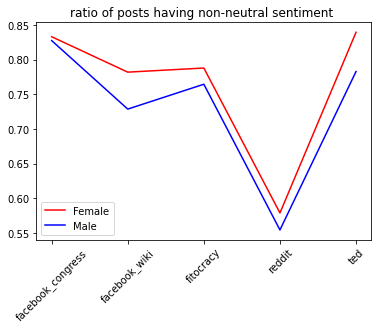

In [65]:
import matplotlib.pyplot as plt
plt.plot(data1[data1['op_gender']=='W']['source'],data1[data1['op_gender']=='W']['Negative'] + data1[data1['op_gender']=='W']['Positive'] + data1[data1['op_gender']=='W']['Mixed'], color='red' )
plt.plot(data1[data1['op_gender']=='M']['source'],data1[data1['op_gender']=='M']['Negative'] + data1[data1['op_gender']=='M']['Positive'] + data1[data1['op_gender']=='M']['Mixed'], color='blue' )
plt.title("ratio of posts having non-neutral sentiment ")
plt.xticks(rotation=45)
plt.legend(['Female', 'Male'])
plt.show()

In [67]:
y = []
y1 = []
for i in X:
    y.append(data1[((data1['op_gender']=='W') & (data1['source']==i))]['Negative'] + data1[((data1['op_gender']=='W') & (data1['source']==i))]['Positive'] + data1[((data1['op_gender']=='W') & (data1['source']==i))]['Mixed'])
    y1.append(data1[((data1['op_gender']=='M') & (data1['source']==i))]['Negative'] + data1[((data1['op_gender']=='M') & (data1['source']==i))]['Positive'] + data1[((data1['op_gender']=='M') & (data1['source']==i))]['Mixed'])

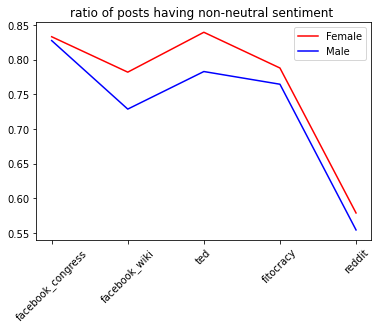

In [68]:
plt.plot(X,y, color='red' )
plt.plot(X, y1, color='blue' )
plt.title("ratio of posts having non-neutral sentiment ")
plt.xticks(rotation=45)
plt.legend(['Female', 'Male'])
plt.show()